In [1]:
import pandas as pd 
import requests
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import json

In [2]:
csv_file = "Resources/EDSTAT_UK&SP.csv"
education_data = pd.read_csv(csv_file)
education_data.head()

,Country Name,Country Code,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,United Kingdom,GBR,Expenditure on primary as % of government expe...,24.71134949,24.98936081,23.62890053,25.4773407,26.19923973,26.46495056,29.44553947,30.64546967,31.57509041,31.11967087,30.09235001,30.77206039,NaN,29.78849983,28.91542053,32.1665802,NaN
1,United Kingdom,GBR,Expenditure on primary as % of total governmen...,2.980230093,3.071850061,3.205369949,3.469130039,3.394249916,3.489840031,3.893019915,3.98781991,4.094099998,3.92324996,3.900079966,3.913100004,NaN,3.864939928,NaN,NaN,NaN
2,United Kingdom,GBR,Expenditure on secondary and post-secondary no...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.55173,NaN,NaN,NaN
3,United Kingdom,GBR,Expenditure on secondary and post-secondary no...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.36905,NaN,NaN,NaN
4,United Kingdom,GBR,Expenditure on secondary as % of government ex...,48.73329926,48.35630035,47.14807129,48.27423096,47.88209152,45.38877869,43.31438065,45.10861969,47.03944016,48.91957092,48.31803894,41.5705986,NaN,40.13864136,41.13214874,41.03583145,NaN


In [3]:
labor_force_total_df = education_data.loc[education_data["Indicator Name"] == "Labor force, total"]
unemployment_total_df = education_data.loc[education_data["Indicator Name"] == "Unemployment, total (% of total labor force)"]
unemployment_male = education_data.loc[education_data["Indicator Name"] == "Unemployment, male (% of male labor force)"]
unemployment_female = education_data.loc[education_data["Indicator Name"] == "Unemployment, female (% of female labor force)"]
labor_force_advanced_education_total = education_data.loc[education_data["Indicator Name"] == "Labor force with advanced education (% of total)"]
labor_force_advanced_education_male = education_data.loc[education_data["Indicator Name"] == "Labor force with advanced education, male (% of male labor force)"]
labor_force_advanced_education_female = education_data.loc[education_data["Indicator Name"] == "Labor force with advanced education, female (% of female labor force)"]






In [4]:
total_df = education_data.loc[
    (education_data["Indicator Name"] == "Labor force, total") | 
    (education_data["Indicator Name"] == "Unemployment, total (% of total labor force)") |  
    (education_data["Indicator Name"] == "Unemployment, male (% of male labor force)"  ) | 
    (education_data["Indicator Name"] == "Unemployment, female (% of female labor force)" ) | 
    (education_data["Indicator Name"] == "Labor force with advanced education (% of total)" ) | 
    (education_data["Indicator Name"] == "Labor force with advanced education, male (% of male labor force)" ) | 
    (education_data["Indicator Name"] == "Labor force with advanced education, female (% of female labor force)" ) 
]


indicator_table_df = total_df.set_index('Indicator Name')
clean_indicator_table = indicator_table_df.drop(columns=['2000', '2012', '2013', "2014", "2015", "2016"])
clean_indicator_table ['2001'] = (clean_indicator_table ['2001'].astype(float)).round(2)
clean_indicator_table ['2002'] = (clean_indicator_table ['2002'].astype(float)).round(2)
clean_indicator_table ['2003'] = (clean_indicator_table ['2003'].astype(float)).round(2)
clean_indicator_table ['2004'] = (clean_indicator_table ['2004'].astype(float)).round(2)
clean_indicator_table ['2005'] = (clean_indicator_table ['2005'].astype(float)).round(2)
clean_indicator_table ['2006'] = (clean_indicator_table ['2006'].astype(float)).round(2)
clean_indicator_table ['2007'] = (clean_indicator_table ['2007'].astype(float)).round(2)
clean_indicator_table ['2008'] = (clean_indicator_table ['2008'].astype(float)).round(2)
clean_indicator_table ['2009'] = (clean_indicator_table ['2009'].astype(float)).round(2)
clean_indicator_table ['2010'] = (clean_indicator_table ['2010'].astype(float)).round(2)
clean_indicator_table ['2011'] = (clean_indicator_table ['2011'].astype(float)).round(2)

In [5]:
#clean_indicator_table.iloc[:, 3:5].mean(axis=1)
#clean_indicator_table.groupby("Indicator Name")

In [6]:
(clean_indicator_table.assign(mean=clean_indicator_table.mean(axis=1))).round(2)
#clean_indicator_table.dtypes


,Country Name,Country Code,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,mean
Indicator Name,,,,,,,,,,,,,,
Labor force with advanced education (% of total),United Kingdom,GBR,89.87,89.76,89.80,89.64,89.90,89.97,89.67,85.24,85.01,84.86,85.03,88.07
"Labor force with advanced education, female (% of female labor force)",United Kingdom,GBR,87.05,87.62,87.23,87.48,88.00,87.98,87.73,82.02,81.70,81.62,81.29,85.43
"Labor force with advanced education, male (% of male labor force)",United Kingdom,GBR,92.42,91.75,92.17,91.66,91.71,91.92,91.59,88.60,88.49,88.30,88.99,90.69
"Labor force, total",United Kingdom,GBR,29259481.00,29588608.00,29868880.00,30142806.00,30589672.00,31037532.00,31240727.00,31647715.00,31825341.00,32010605.00,32192080.00,30854858.82
"Unemployment, female (% of female labor force)",United Kingdom,GBR,4.10,4.40,4.10,4.20,4.30,4.90,4.90,5.10,6.40,6.90,7.30,5.15
"Unemployment, male (% of male labor force)",United Kingdom,GBR,5.20,5.60,5.40,4.90,5.20,5.70,5.50,6.10,8.50,8.60,8.60,6.30
"Unemployment, total (% of total labor force)",United Kingdom,GBR,4.70,5.00,4.80,4.60,4.80,5.40,5.30,5.60,7.50,7.80,8.00,5.77
Labor force with advanced education (% of total),Spain,ESP,79.56,81.00,81.60,82.62,82.18,82.53,82.71,82.68,82.72,82.23,82.16,82.00
"Labor force with advanced education, female (% of female labor force)",Spain,ESP,75.28,77.98,79.09,80.40,79.69,80.48,80.51,80.86,81.55,81.57,81.64,79.91


Text(0, 0.5, 'Percentage of Labor Force')

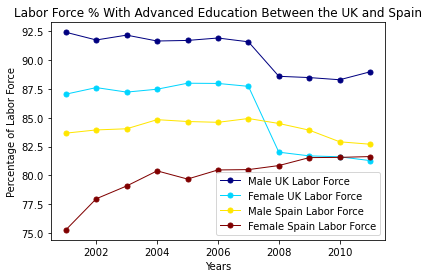

In [7]:
labor_force = pd.DataFrame({'Male UK Labor Force': [92.42, 91.75, 92.17, 91.66, 91.71, 91.92, 91.59, 88.60, 88.49, 88.30, 88.99],
   'Female UK Labor Force': [87.05, 87.62, 87.23, 87.48, 88.00, 87.98, 87.73, 82.02, 81.70, 81.62, 81.29], 
   'Male Spain Labor Force': [83.67, 83.95, 84.05, 84.84, 84.68, 84.61, 84.94, 84.51, 83.93, 82.92, 82.71], 
   'Female Spain Labor Force': [75.28, 77.98, 79.09, 80.40, 79.69, 80.48, 80.51, 80.86, 81.55, 81.57, 81.64]                          
   }, index=[2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011])
lines = labor_force.plot(lw=1, colormap='jet', marker='.', markersize=10, title='Labor Force % With Advanced Education Between the UK and Spain')
lines.set_xlabel("Years")
lines.set_ylabel("Percentage of Labor Force")

Text(0.5, 1.0, 'Spain: Average Unemployment Total Vs Average Labor Force Total From 2001-2011')

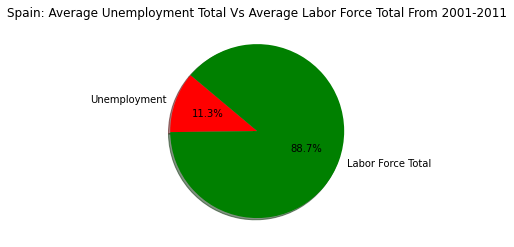

In [12]:
#Pie Graph of Spain: Average Unemployment Total Vs Average Labor Force Total From 2001-2011

labels = ["Unemployment", "Labor Force Total"]

# The values of each section of the pie chart
sizes = [2743588.38, 21535230.64]

# The colors of each section of the pie chart
colors = ["red", "green",]

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('Spain: Average Unemployment Total Vs Average Labor Force Total From 2001-2011')

Text(0.5, 1.0, 'UK: Average Unemployment Total Vs Average Labor Force Total From 2001-2011')

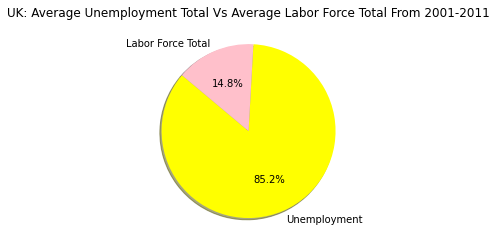

In [13]:
labels = ["Unemployment", "Labor Force Total"]

# The values of each section of the pie chart
sizes = [178032535, 30854858.82]

# The colors of each section of the pie chart
colors = ["yellow", "pink",]

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('UK: Average Unemployment Total Vs Average Labor Force Total From 2001-2011')